# Informe Tarea 2 Grupo 2
## Nombre Alumnos: Ignacio Brito, Jos√© Tom√°s De la Pe√±a, √çtalo Salazar, Alex Villarroel

## P1 - Programaci√≥n del Problema Directo
Se provee de una carpeta ajuste_ortogonal_recta que deber√° copiar en la carpeta del paquete de python
desarrollado en la Tarea 1, es decir al interior de GF7013/models/. En este m√≥dulo se encuentra la definici√≥n
de la recta param√©trica y el prototipo de una clase forward que permitir√° calcular el modelo directo.
En un intento por generalizar los c√≥digos de muestreo que se utilizan posteriormente, se definir√° un requerimiento
que debe cumplir la clase forward (que implementa el modelo directo para cualquier problema y no s√≥lo para el
ajuste ortogonal a la recta): que un objeto que sea instancia de la clase forward debe implementar la funci√≥n
miembro eval(m) donde m es el vector de par√°metros del modelo.
Para el problema del ajuste ortogonal de la linea recta, se tiene m = [a, Œ∏]‚ä§, donde a es la distancia de la recta
al origen y Œ∏ define la orientaci√≥n de la recta en sentido anti-horario con respecto al eje x (ver apunte que define
el problema de ajuste ortogonal a la recta).
Luego se pide:

### P1.1 Completar la funci√≥n eval(self, m) de la manera m√°s concisa posible. Para ello utilice el paquete recta que se provee.
-----------------------------------------------------------------------------------------------
La funci√≥n eval se calcul√≥ calcula la predicci√≥n de los par√°metros del modelo, es decir, dados los valores de las observaciones (incluyendo los sigmas), y los par√°metros de modelo, en este caso a y el √°ngulo $\theta$, retorne los valores de la estimaci√≥n del problema directo

Este m√©todo se implement√≥ de la siguiente manera:

```python
class forward(object):
# 
# definici√≥n de la clase ...
# m√©todo eval
    def eval(self, m):
        """
        Computes a prediction of the model parameters (see description in this
        module docstring).
        - m = NP.array([a, theta]) with theta in degrees (both float quantities). 
          -> a is the distance between straight line to origin of coordinate system and 
          -> theta is the orientation of the straight line measured counter-clockwise 
            measured from x axis. 
        """
        # Extract model parameters
        a, theta = m[0], m[1]

        # calculate the predicted points in the straight line
        dpred = recta.calc_xy_pred(a, theta, self.x_obs, self.y_obs)

        # dpred incluyendo el c√°lculo de los sigma

        return dpred


In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../..')))


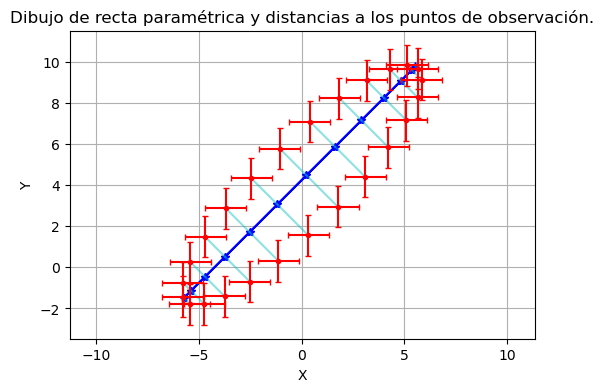

In [3]:
### P1.2 - Ejemplo de modelo directo


from GF7013.models.ajuste_ortogonal_recta.forward import forward
import numpy as np
from GF7013.bin.Tarea2.P1.datos import obtener_datos_elipses
from GF7013.models.ajuste_ortogonal_recta import recta
N = 25
semi_eje_mayor = 8
semi_eje_menor = 2
alpha = 45
delta_x = 0
delta_y = 4
desviacion_estandar_x = 1.0
desviacion_estandar_y = 1.0
# valores de d
x_obs, y_obs, sigma_x, sigma_y = obtener_datos_elipses(
                                        N = N,
                                        a = semi_eje_mayor,
                                        b = semi_eje_menor,
                                        alpha = alpha,
                                        deltax = delta_x,
                                        deltay = delta_y,
                                        sigma_x = desviacion_estandar_x,
                                        sigma_y = desviacion_estandar_y)
# valores de m 
a = 3
theta = 45 # grados sexagesimales despues de hacer P1.1)
# se define m como un array
m = np.array([a, theta]) # modelo de recta a graficar.

directo = forward(x_obs=x_obs, y_obs=y_obs, sigma_x=sigma_x, sigma_y=sigma_y)
# le calculamos las predicciones de la recta
# s es el vector con la proyeccion ortogonal de cada punto en la recta.
# s = np.array([np.array([x_obs[i], y_obs[i]]).dot(t) for i in range(0, len(x_obs))])
x_pred, y_pred, s = directo.eval(m)

# plotear los resultados
import matplotlib.pyplot as plt
fig = plt.figure(1)
fig.clear()
fig.set_size_inches((6, 4))
ax = fig.add_subplot(111)
# en el comando siguiente, si el color es 'none' no se grafica el elemento.
# recta.plot_recta(ax, *m, x_obs=x_obs, y_obs=y_obs, color_dist='c', color='b')
ax.plot(x_pred, y_pred, 'b-*', label='Recta param√©trica')
ax.plot([x_pred, x_obs],
        [y_pred, y_obs],
        linestyle = '-', 
        color = 'c', 
        alpha = alpha/100)
ax.errorbar(x=x_obs, y=y_obs, xerr=sigma_x, yerr=sigma_y, fmt='.r', capsize=2)
ax.axis('equal')
ax.grid('on')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Dibujo de recta param√©trica y distancias a los puntos de observaci√≥n.')
fig.canvas.draw()
plt.show()

##  P2. Modelaci√≥n Inversa usando M√©todos Bayesianos: A priori's y funci√≥n  $f_{prior}(m)$

### P2.1. Densidad volum√©trica a priori para los par√°metros del modelo fprior(m)
Para la densidad volum√©trica a priori de los par√°metros del modelo fprior(m), se asumir√° el estado homog√©neo de informaci√≥n. Para ello, se considera que los par√°metros del modelo son ambos par√°metros cartesianos, por lo que la fdp a priori para m ser√° la de una distribuci√≥n uniforme.


Se debe definir un rango de valores posibles para el par√°metro a que sea lo suficientemente grande, por ejemplo, ¬±2 veces el m√°ximo de las normas de $d^{obs}_k$ (que son los datos observados a ajustar con la recta, o los datos sint√©ticos a usar en esta tarea).

Adem√°s, se define el rango de posibles valores de Œ∏ en el intervalo $[‚àí180, 180[$ grados sexagesimales.

En la Tarea 1, en GF7013/probability_functions/pdf/pdf_uniform_nD.py programaron una
clase pdf_uniform_nD, que permite calcular la verosimilitud (i.e., sin normalizar) - y su logaritmo natural - de una distribuci√≥n uniforme de n dimensiones.

En la carpeta Tarea2/tests escriba un script test_fprior.py que cree una instancia de pdf_-
uniform_nD que represente fprior (m) para el caso del problema del ajuste a la recta y genere 1E5 muestras de fprior(m). Graficar el histograma conjunto de (a, Œ∏) ‚Äì use matplotlib.pyplot.hist2d ‚Äì y los histogramas marginales para cada uno de los dos par√°metros. Recuerde escoger bien el n√∫mero o tama√±o de casilleros del histograma para que luzca como una distribuci√≥n uniforme.

----------------------------------Resoluci√≥n -------------------------------------------------------

Para la resoluci√≥n del problema, en la funci√≥n test_fprior se defini√≥ la funci√≥n histogram_p2_1 que realiza el histograma 2d solicitado con sus respectivos histogramas marginales para cada par√°metro. 

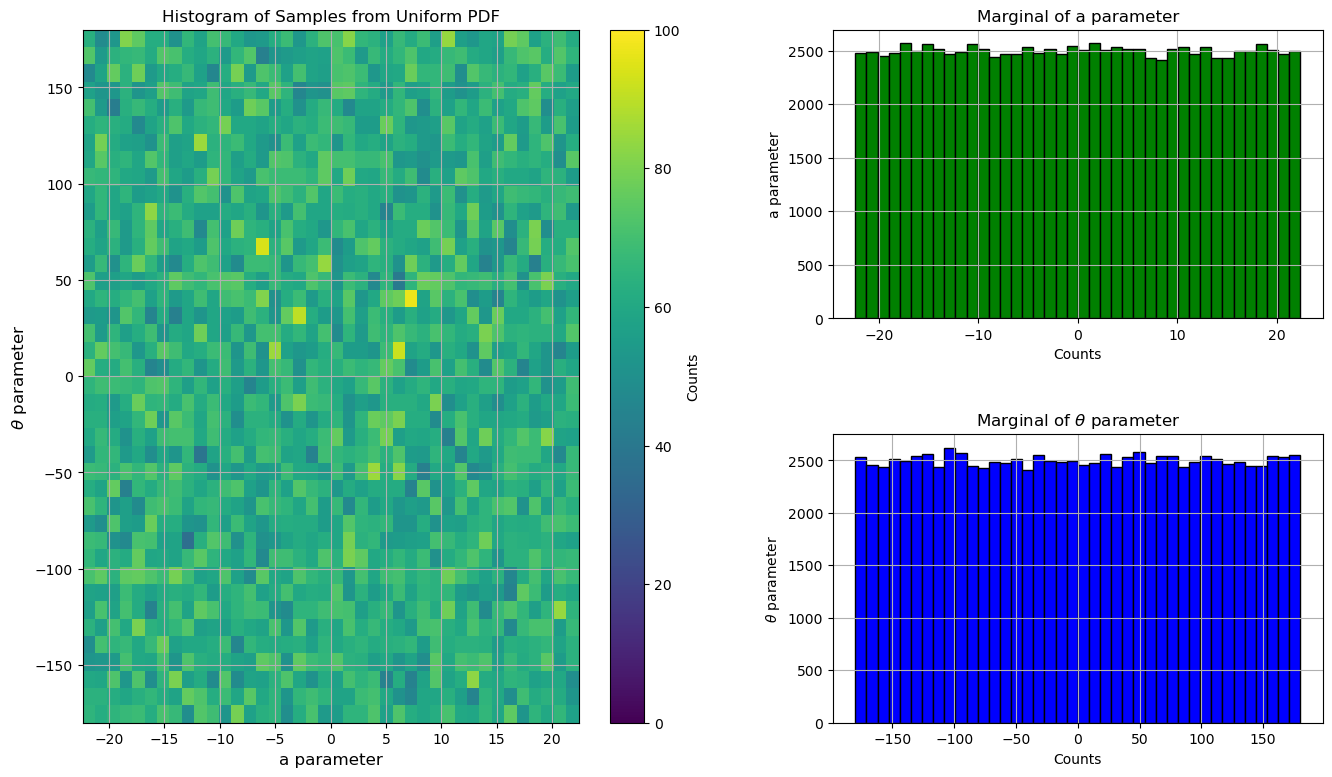

In [6]:
from GF7013.probability_functions.pdf import pdf_uniform_nD
norm_dobs = np.sqrt((x_obs**2+y_obs**2))
#
ll_a, ul_a = -2*np.max(norm_dobs), 2* np.max(norm_dobs)
ll_theta, ul_theta = -180,180 
#
lower_lim = np.array([ll_a,ll_theta])
upper_lim = np.array([ul_a,ul_theta])
par = {'lower_lim': lower_lim,'upper_lim':upper_lim}
pdf_uniforme = pdf_uniform_nD(par)
#
N_samples = 1e5
#
LogOfZero = None
rng = np.random.default_rng(42)  # Para reproducibilidad
f_prior = pdf_uniform_nD(par, LogOfZero=LogOfZero, rng=rng) 
samples = f_prior._draw(N_samples)
# Ahora llamamos a la funci√≥n para plotear que se cre√≥ en test_fprior.py
# podr√≠amos agregarla a utils
import GF7013.bin.Tarea2.tests.test_fprior as test_fprior
fig = test_fprior.histogram_p2_1(samples,0,100);
plt.show();


### P2.2 Funci√≥n de Verosimilitud $\mathcal{L}(m)$

Para poder definir la funci√≥n de verosimilitud de un modelo $\mathcal{L}(m)$ primero se definir√° la distribuci√≥n a priori
para la variable de inter√©s. En este caso, como se desea hacer un ajuste ortogonal de una recta, se quiere encontrar
modelos que minimicen la distancia a los datos. Luego, la variable sobre la cual se debe definir informaci√≥n a priori
corresponde a la distancias $\Delta_k$ entre los pares ordenados observados y la recta (ver archivo pdf adjunto con la tarea y explicado por el profesor auxiliar).

En esta tarea se asume que los errores de dichas distancias son independientes y que siguen una distribuci√≥n normal. Como se quiere que dichas distancias sean lo m√°s peque√±as posibles, se propone utilizar una distribuci√≥n
normal, con media nula y varianzas $\sigma^2_{\Delta_k}$ con fdp:

$$ \rho_\Delta(\mathbf{\Delta,\sigma^2_{\Delta_k}}) =  \nu e ^{-\frac{1}{2}\sum_{k=1}^N \frac{\Delta^2_k}{\sigma^2_{\Delta_k}}}  $$

Donde $\nu$ es una constante de normalizaci√≥n.

Luego, si para un modelo $\mathbf{m}$ dado, se calcula las distancias $\mathbf{\Delta(m)}$ y la bariaza de dichas distancias $\mathbf{\sigma^2_\Delta(m)}$, la verosimilitud de dicho modelo se puede calcular como:

$$ùìõ(\mathbf{m}) = \rho_\Delta(\mathbf{\Delta(m),\sigma^2_{\Delta}(m)}) $$

La funci√≥n de verosimilitud se encuentra programada en GF7013/probability_functions/likelihood_function.py. Esta recibe una instancia de modelo directo (forward) y una instancia de la fdp a priori de los datos (pdf_data). Se recomienda leer el c√≥digo de la funci√≥n de verosimilitud antes de proseguir con el desarrollo
de la tarea.

## P2.2.1 Verificaci√≥n de la programaci√≥n de $\rho_\Delta$

La funci√≥n de probabilidad a priori para las observaciones se asumir√° como una distribuci√≥n Normal Multivariada. En la Tarea 1, se program√≥ la clase pdf_normal.py en el m√≥dulo GF7013/probability_functions/pdf_normal.py. En esta parte de la tarea debe cerciorarse de que dicha clase funcione, y es una oportunidad para arreglar cualquier error que haya tenido en el desarrollo de la Tarea 1.

Para verificar su programaci√≥n de pdf_normal.py, cree un script en el m√≥dulo Tarea2/tests/test_pdf_normal.py que genera 100.000 muestras de una distribuci√≥n normal multivariada con media mu = np.array([-1, 4]) y matriz de covarianza cov = NP.array([[2, 1], [1, 4]]) y que luego verifique que el promedio y matriz de covarianza calculados con las muestras sea similar a mu y cov anteriores, respectivamente.

Adem√°s, se pide hacer un histograma 2D de las muestras de la fdp conjunta y hacer histogramas de las 2 fdp marginales.

Sample Mean: [-1.00312805  3.99973846]
Sample Covariance:
 [[1.99495575 0.99220652]
 [0.99220652 4.0409389 ]]


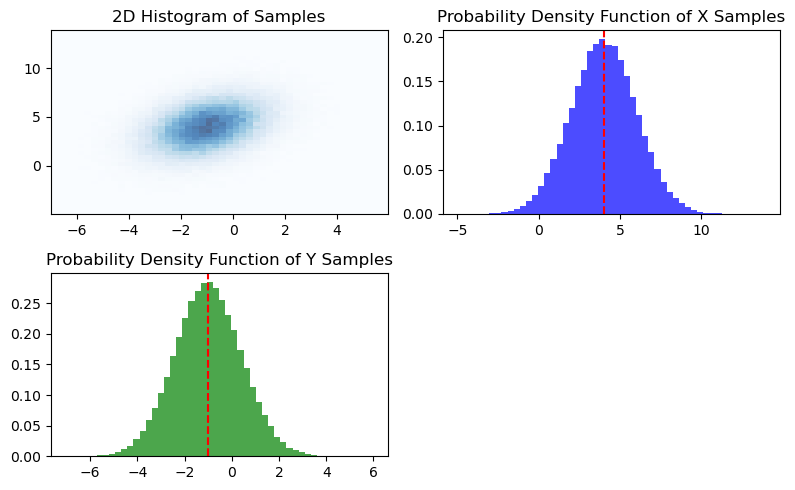

In [7]:
from GF7013.probability_functions.pdf import pdf_normal

N_samples = 1e5
mu = np.array([-1, 4])
cov = np.array([[2, 1], [1, 4]])
rng = np.random.default_rng(42)  # Para reproducibilidad
par = {'mu': mu, 'cov': cov}

f_prior = pdf_normal(par, rng=rng)
samples = f_prior._draw(N_samples)

# Verificar covarianza y media de las muestras
sample_mean = np.mean(samples, axis=1)
sample_cov = np.cov(samples)
print("Sample Mean:", sample_mean)
print("Sample Covariance:\n", sample_cov)

# Graficar las muestras
fig, ax = plt.subplots(2, 2, figsize=(8, 5))
ax[0, 0].hist2d(samples[0], samples[1], bins=50, density=True, cmap='Blues', alpha=0.7)
ax[0, 0].set_title('2D Histogram of Samples')
ax[0, 1].hist(samples[1], bins=50, density=True, alpha=0.7, color='blue')
ax[0, 1].axvline(mu[1], color='red', linestyle='--', label='Mean')
ax[0, 1].set_title('Probability Density Function of X Samples')
ax[1, 0].hist(samples[0], bins=50, density=True, alpha=0.7, color='green')
ax[1, 0].axvline(mu[0], color='red', linestyle='--', label='Mean')
ax[1, 0].set_title('Probability Density Function of Y Samples')
fig.delaxes(ax[1, 1])
plt.tight_layout()
plt.show()

### P2.2.2. Verificaci√≥n de la programaci√≥n de L(m)
Para verificar la programaci√≥n de L(m), se utilizar√° el m√©todo de Grid-Search para resolver el problema inverso (ver apuntes del curso GF5013), esto se puede hacer ya que solo hay dos par√°metros involucrados. Para ello, use los datos sint√©ticos que se proveen en GF7013/bin/Tarea2/P1/P1b.py y cree un script en el m√≥dulo
Tarea2/tests/test_Likelihood.py.
En dicho script,

1. Defina un conjunto de valores de a y Œ∏ (use np.linspace) que cubran el rango de valores con probabilidad
no nula de $f_{prior}(m)$. Luego, cree un conjunto de modelos m con todas las combinaciones posibles de a y
Œ∏.
2. Cree una instancia de la clase ensemble, que se encuentra definida en GF7013/model_parameters/
ensemble.py, guarde ah√≠ el conjunto de modelos y llene las variables fprior, like, y f con las verosimilitudes
correspondientes a cada uno de esos modelos (i.e., use la funci√≥n likelihood de los objetos definidos para
$f_{prior}(m)$  y $\mathcal{L}(m)$)
3. Cree otra instancia de la clase ensemble, que se encuentra definida en GF7013/model_parameters/
ensemble.py, guarde ah√≠ el conjunto de modelos y llene las variables fprior, like, y f con el logaritmo
natural de las verosimilitudes correspondientes a cada uno de esos modelos (i.e., use la funci√≥n log_likelihood de los objetos definidos para $f_{prior}(m)$  y $\mathcal{L}(m)$)

4. Haga un gr√°fico 2D con colores (puede usar matplotlib.pyplot.pcolor o matplotlib.pyplot.scatter, en el segundo teniendo cuidado con el tama√±o de los s√≠mbolos) para los valores de verosimilitud fprior, like, y f; y del logaritmo natural de la verosimilitud fprior, like, y f (son 6 gr√°ficos de colores en total)

#### Resoluci√≥n
1- Definir todas las combinaciones de valores de a y de $\theta$ es posible realizando un mallado 2d con np.meshgrid(), y luego uniendo ambos parametros aplanando cada componente del mallado. Los limites de a fueron definidos en el enunciado como $\pm 2 \cdot max(|d_{k}^{obs}|)$, mientra que $\theta$ de -180 a 180 grados hexadecimales



[ -37.01978056 -180.        ]
[ -36.27190621 -180.        ]
[ -35.52403185 -180.        ]
[ -34.7761575 -180.       ]
[ -34.02828314 -180.        ]
[ -33.28040879 -180.        ]
[ -32.53253443 -180.        ]
[ -31.78466008 -180.        ]
[ -31.03678572 -180.        ]
[ -30.28891137 -180.        ]
[ -29.54103701 -180.        ]
[ -28.79316266 -180.        ]
[ -28.0452883 -180.       ]
[ -27.29741395 -180.        ]
[ -26.54953959 -180.        ]
[ -25.80166524 -180.        ]
[ -25.05379089 -180.        ]
[ -24.30591653 -180.        ]
[ -23.55804218 -180.        ]
[ -22.81016782 -180.        ]
[ -22.06229347 -180.        ]
[ -21.31441911 -180.        ]
[ -20.56654476 -180.        ]
[ -19.8186704 -180.       ]
[ -19.07079605 -180.        ]
[ -18.32292169 -180.        ]
[ -17.57504734 -180.        ]
[ -16.82717298 -180.        ]
[ -16.07929863 -180.        ]
[ -15.33142427 -180.        ]
[ -14.58354992 -180.        ]
[ -13.83567556 -180.        ]
[ -13.08780121 -180.        ]
[ -12.33992685 -

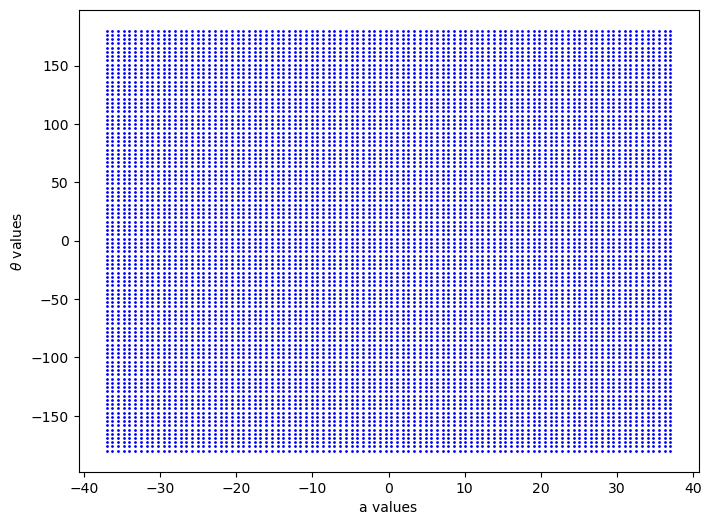

In [25]:
from GF7013.bin.Tarea2.P1.datos import obtener_datos_elipses
from GF7013.model_parameters.ensemble import ensemble
from GF7013.probability_functions.pdf import pdf_uniform_nD,pdf_normal
from GF7013.probability_functions.likelihood.likelihood_function import likelihood_function
from GF7013.models.ajuste_ortogonal_recta.forward import forward
from GF7013.models.ajuste_ortogonal_recta.recta import calc_dist_sigma
# Generar datos sinteticos
N = int(70)
semi_eje_mayor = 10
semi_eje_menor = 2
alpha = -45
delta_x = 0
delta_y = -10
desviacion_estandar_x = 1.0
desviacion_estandar_y = 0.5

x_obs, y_obs, sigma_x, sigma_y = obtener_datos_elipses(
                                        N = N,
                                        a = semi_eje_mayor,
                                        b = semi_eje_menor,
                                        alpha = alpha,
                                        deltax = delta_x,
                                        deltay = delta_y,
                                        sigma_x = desviacion_estandar_x,
                                        sigma_y = desviacion_estandar_y)

# definici√≥n de los par√°metros
norm_dobs = np.sqrt((x_obs**2+y_obs**2))
#
ll_a, ul_a = -2*np.max(norm_dobs), 2* np.max(norm_dobs)
ll_theta, ul_theta = -180,180 
#
lower_lim = np.array([ll_a,ll_theta])
upper_lim = np.array([ul_a,ul_theta])

# Valores de la grilla

theta_values = np.linspace(ll_theta, ul_theta, 100)
a_values = np.linspace(ll_a, ul_a, 100)

Nmodels = len(theta_values) * len(a_values)
Npar=2

a_grid,theta_grid = np.meshgrid(a_values,theta_values)
m_values = np.column_stack([a_grid.ravel(),theta_grid.ravel()])
# plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(a_grid, theta_grid, s=1, color='blue')
ax.set_xlabel('a values')
ax.set_ylabel(r'$\theta$ values')
for i,m in enumerate(m_values):
    print(m)

2 y 3- 

In [ ]:
par = {'lower_lim': lower_lim, 'upper_lim': upper_lim}
LogOfZero = None
rng_uni = np.random.default_rng(66)
f_prior = pdf_uniform_nD(par=par, LogOfZero=LogOfZero, rng=rng_uni)

# Forward model
forward_model = forward(x_obs, y_obs, sigma_x, sigma_y)

# Likelihood function
LogOfZero = None
rng = np.random.default_rng(777)

likelihood=np.zeros(Nmodels)
likelihood_f_prior=np.zeros(Nmodels)
likelihood_f_posterior= np.zeros(Nmodels)

# Log likelihood
loglikelihood = np.zeros(Nmodels)
loglikelihood_f_prior = np.zeros(Nmodels)
loglikelihood_f_posterior = np.zeros(Nmodels)

mu = np.zeros(N)
cov = np.eye(N)

par = {'mu': mu, 'cov': cov}
likelihood_func = likelihood_function(forward_model, pdf_normal(par=par, rng=rng))

for i, model in enumerate(m_values):
    likelihood_f_prior[i] = f_prior._likelihood(model)
    likelihood[i] = likelihood_func.likelihood(model)
    likelihood_f_posterior[i] = likelihood_f_prior[i] * likelihood[i]
    
    # Log likelihood
    loglikelihood_f_prior[i] = f_prior._log_likelihood(model)
    loglikelihood[i] = likelihood_func.log_likelihood(model.tolist())
    loglikelihood_f_posterior[i] = loglikelihood_f_prior[i] + loglikelihood[i]

# Create ensemble objects
ensamble = ensemble(Npar = Npar, Nmodels = Nmodels, use_log_likelihood=False)

ensamble.fprior = likelihood_f_prior
ensamble.like = likelihood
ensamble.f = likelihood_f_posterior

ensamble_log = ensemble(Npar=Npar,Nmodels=Nmodels,use_log_likelihood=True)

ensamble_log.fprior = loglikelihood_f_prior
ensamble_log.like = loglikelihood
ensamble_log.f = loglikelihood_f_posterior

Floating point overflow when calculating the normalization constant.
Use log_pdf or (log) Likelihood values instead of pdf.


AttributeError: 'tuple' object has no attribute 'ndim'